<a href="https://colab.research.google.com/github/darren96483/Math-Modeling-2025/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

            Abundance
year                 
1984-01-01      18.55
1985-01-01      18.73
1986-01-01      21.23
1987-01-01      24.08
1988-01-01      29.33


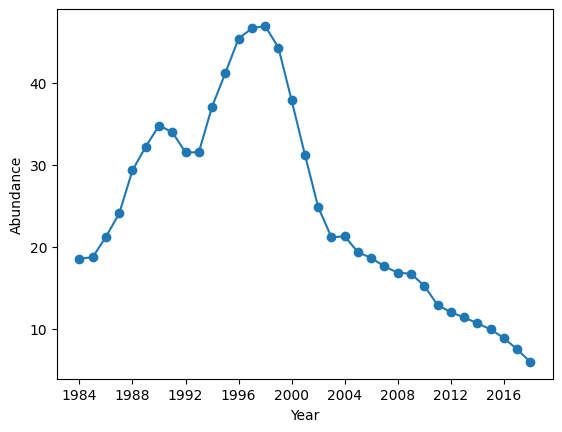

Statistic: -1.3795364072856928
P-Value: 0.5920463586294814


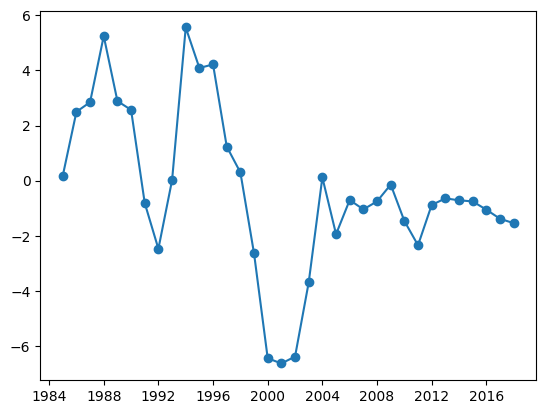

Statistic: -4.041470758728542
P-Value: 0.001208267082001962


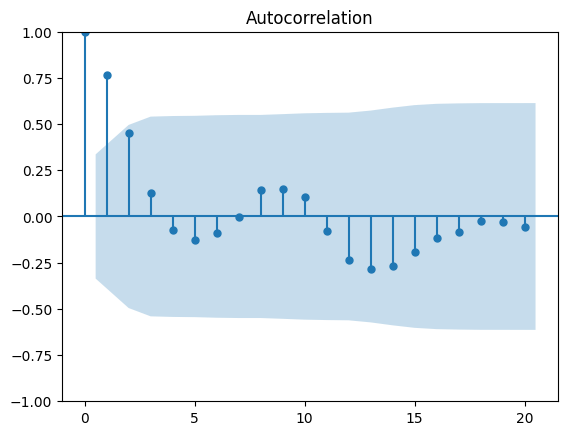

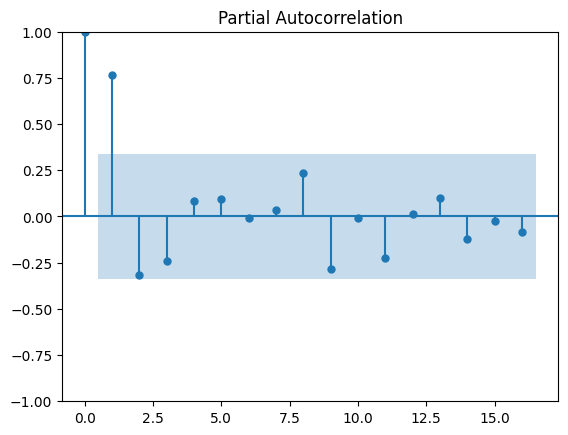

Model 1 AIC: 144.6186001639549
Model 2 AIC: 144.16620056667804
Model 3 AIC: 143.22922702212023
Model 4 AIC: 146.62470090112777
Model 5 AIC: 144.6552739336604
Model 6 AIC: 146.65525882007245
Model 7 AIC: 145.1009887283307
Model 8 AIC: 144.54554751028274


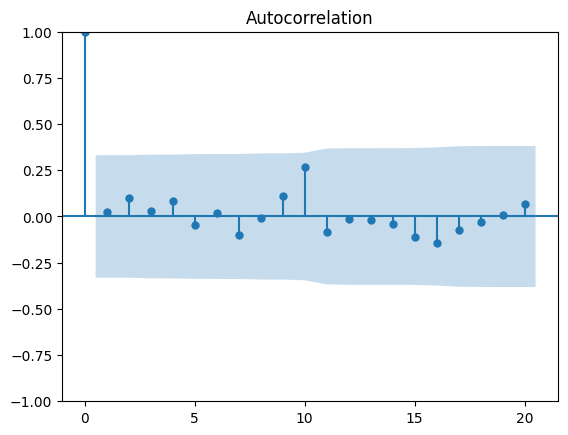

     lb_stat  lb_pvalue
1   0.021211   0.884206
2   0.412732   0.813535
3   0.452969   0.929096
4   0.752684   0.944676
5   0.838877   0.974488
6   0.853000   0.990577
7   1.314296   0.988053
8   1.316084   0.995357
9   1.909166   0.992824
10  5.637025   0.844782


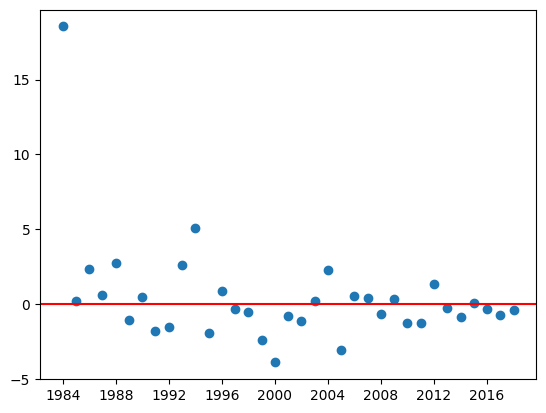

ShapiroResult(statistic=0.6055292932292164, pvalue=1.6881380264536528e-08)
year
1984-01-01    18.55
Freq: YS-JAN, dtype: float64
ShapiroResult(statistic=0.9609819020613118, pvalue=0.2596596808915366)
2019-01-01    4.715391
2020-01-01    3.942709
2021-01-01    3.571768
2022-01-01    3.393690
2023-01-01    3.308201
2024-01-01    3.267160
Freq: YS-JAN, Name: predicted_mean, dtype: float64


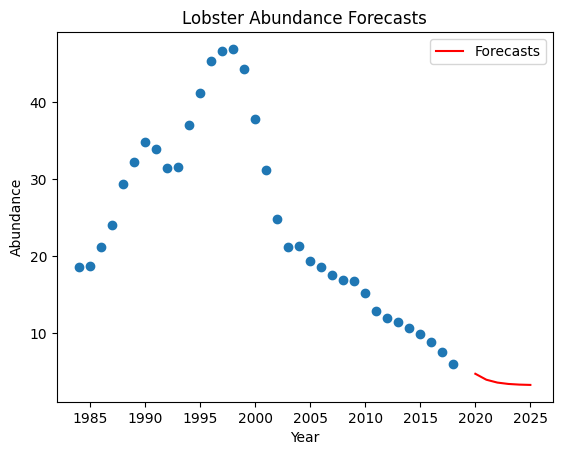

In [ ]:
# importing data
# pandas = data manipulation
# matplotlib.pyplot = plotting
# statsmodels library contains all statistical models
# ARIMA = ARIMA model
# acorr_ljungbox is a statistical test that tests for autocorrelation (Jung box)
# plot acf and pacf test for autocorrelation by measuring lags
# shapiro tests if residuals are normally distributed
# adfuller checks for
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import shapiro
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# mainpulating data to make it usable
lobster_population = pd.read_csv("CapeCodPopulation.csv")
lobster_population['year'] = pd.to_datetime(lobster_population['year'],
                                            format = '%Y')
lobster_population.set_index('year', inplace = True)
lobster_population.rename(columns =
                          {"abundance in SNE area (millions of lobsters)":
                           "Abundance"}, inplace = True)
lobster_population.index = lobster_population.index.to_period('Y').to_timestamp()
print(lobster_population.head())

# creating visualization to see if there is a model that could be used
plt.plot(lobster_population.index, lobster_population['Abundance'],
         marker = "o")
plt.xlabel('Year')
plt.ylabel('Abundance')
plt.show()

# since it has a very irregular shape, we can use an ARIMA model to reduce
# autocorrelation and the randomness

# using augmented Dickey Fuller test to check stationarity
stationaritytest1 = adfuller(lobster_population['Abundance'])
print("Statistic:", stationaritytest1[0])
print("P-Value:", stationaritytest1[1])
# since this P-Value is greater than 0.05, it is not stationary

lobster_population['Differenced'] = lobster_population['Abundance'].diff()
plt.plot(lobster_population.index, lobster_population['Differenced'],
         marker = "o")
plt.show()
stationaritytest2 = adfuller(lobster_population['Differenced'].dropna())
print("Statistic:", stationaritytest2[0])
print("P-Value:", stationaritytest2[1])
# due to a P-Value <0.05, it is stationary, therefore d = 1 (p, 1, q)


# check lags for model parameters
plot_acf(lobster_population['Differenced'].dropna(), lags = 20)
plot_pacf(lobster_population['Differenced'].dropna(), lags = 16)
plt.show()

# creating multiple arima models to compare model validity
model1 = ARIMA(lobster_population['Abundance'], order = (1,1,1))
model2 = ARIMA(lobster_population['Abundance'], order = (2,1,1))
model3 = ARIMA(lobster_population['Abundance'], order = (1,1,2))
model4 = ARIMA(lobster_population['Abundance'], order = (2,1,3))
model5 = ARIMA(lobster_population['Abundance'], order = (2,1,2))
model6 = ARIMA(lobster_population['Abundance'], order = (3,1,2))
model7 = ARIMA(lobster_population['Abundance'], order = (3,1,1))
model8 = ARIMA(lobster_population['Abundance'], order = (1,1,3))
# creating the arima model values
model1_fit = model1.fit()
model2_fit = model2.fit()
model3_fit = model3.fit()
model4_fit = model4.fit()
model5_fit = model5.fit()
model6_fit = model6.fit()
model7_fit = model7.fit()
model8_fit = model8.fit()

# evaluating which is the strongest based on AIC
print("Model 1 AIC:", model1_fit.aic)
print("Model 2 AIC:", model2_fit.aic)
print("Model 3 AIC:", model3_fit.aic)
print("Model 4 AIC:", model4_fit.aic)
print("Model 5 AIC:", model5_fit.aic)
print("Model 6 AIC:", model6_fit.aic)
print("Model 7 AIC:", model7_fit.aic)
print("Model 8 AIC:", model8_fit.aic)

# because model 3 with parameters (1,1,2) has lowest AIC, it is the best
# using model 3 (1,1,2), evaluate its strength / validity
residuals = model3_fit.resid
plot_acf(residuals.dropna(), lags = 20)
plt.show()
ljung_box_results = acorr_ljungbox(residuals, lags = 10, return_df = True)
print(ljung_box_results)
plt.scatter(lobster_population.index, residuals)
plt.axhline(y = 0, color = "red")
plt.show()
shapiro_test = shapiro(residuals)
print(shapiro_test)

# removing outlier from residual. Clear outlier from the non-diff
z_scores = abs((residuals - residuals.mean()) / residuals.std())
outliers = residuals[z_scores > 3]
print(outliers)
cleaned_residuals = residuals[z_scores <= 3]
shapiro_test2 = shapiro(cleaned_residuals)
print(shapiro_test2)

# creating the forecasts
model3_forecasts = model3_fit.forecast(steps = 6)
forecast_years = pd.date_range(start = lobster_population.index[-1]
                               + pd.DateOffset(months = 1),
                               periods = 7, freq = 'YE')[1:]
forecast_dataframe = pd.DataFrame({
    'year': forecast_years,
    'Abundance': model3_forecasts
})
print(model3_forecasts)

# final plot of the results
plt.scatter(lobster_population.index, lobster_population['Abundance'])
plt.plot(forecast_dataframe['year'], forecast_dataframe['Abundance'],
         color = "red", label = "Forecasts")
plt.xlabel("Year")
plt.ylabel("Abundance")
plt.title("Lobster Abundance Forecasts")
plt.legend()
plt.show()